# Построение графика по экспериментальным точкам

Пусть у нас мого экспериментальных точек. Очень много. Надо провести через них кривую (например, линию), чтобы она с наименьшим отклонением проходила через набор точек. Она может проходить через некоторые точки (не обязательно) и проходить недалеко от других точек.

Почему нельзя при этом интерполировать?

* очень много точек, значит интерполяционный полином высокой степени и могут начаться биения,
* не нужно проводить сплайны, потому что экспериментальные точки содержат ошибки измерения и нужно провести кривую в пределах погрешностей эксперимента,
* пытаемся найти форму зависимости теоретической кривой по экспериментальным данным (это прямая, парабола, экспонента или что-то другое?)

## Постановка задачи

Даны экспериментальные точки:

* значения по горизонтальной оси, будем называть ее Х. Лежат в списке х или в файле `xdata.txt`
* значения по вертикальной оси, будем называть ее Y. Лежат в списке у или в файле `ydata.txt`
* знаем предполагаемую форму кривой (прямая, парабола, экспонента или другая кривая), но не знаем коэффиценты в функции этой кривой. Эта кривая называется "апроксимирующей фукнцией".

Коэффициенты этой апроксимирсимирующей функции мы и будем искать так, чтобы отклонение ее от экспериментальных точек было минимальным. Это задача оптимизации и решается с помощью функции **curve_fit** из пакета **scipy.optimize**.

Будем искать минимальное квадратичное отклонение. [Почему берем квадратичное отклонение](lsqrt.md) и что это такое.

## Пример: построение произвольной функции по экспериментальным точкам

* читаем данные из файлов `xdata.txt` и `ydata.txt` в переменные x и y.
* опеределяем функцию, которая по координате х и коэффициентам b0, b1, b2 .. bn вычисляет значение y. Назовем функцию `f`.
* по набору экспериментальных точек х и у и заданной функции f вычисляем коэффициенты b0, b1, .. bn. Задача решена.
* рисуем график экспериментальных точек и найденной апроскимирующей функции.

Попробуем сначала на простой функции, параболе $x^2$

### import

Понадобыится curve_fit из пакета scipy.optimize и все для рисования графиков.

In [113]:
import numpy as np
import matplotlib.pyplot as plt

### Читаем данные из фалов 

Сохраните эти данные в файлы в **той же директории, что ваша тетрадь**.

В файл `xdata.txt` положите числа. Это будут наши "эспериментальные данные".
```
-4.53349565537
-4.09365239181
-3.46164907362
-2.27536520922
-0.799518640116
0.258848610464
0.678142088827
1.67746174919
3.33979664705
3.87971285728
4.61988761783
```

В файл `ydata.txt` полжите числа
```
24.9934393435
16.0864373629
9.35597227962
4.40895322612
1.05652519476
0.0593537295658
1.07912259931
4.22402583041
8.77775630747
15.9549972433
24.9164389595
```

Не забудьте сохранить записанные данные (Save).

In [114]:
# читаем данные из файлов
x = np.fromfile('xdata.txt', float, sep='\n')
y = np.fromfile('ydata.txt', float, sep='\n')

Проверяем, что прочитали правильно.

In [115]:
print(x)
print(y)

[-4.53349566 -4.09365239 -3.46164907 -2.27536521 -0.79951864  0.25884861
  0.67814209  1.67746175  3.33979665  3.87971286  4.61988762]
[24.99343934 16.08643736  9.35597228  4.40895323  1.05652519  0.05935373
  1.0791226   4.22402583  8.77775631 15.95499724 24.91643896]


Проверяем, что количество х и у координат совпадают

In [116]:
len(x) == len(y)

True

### Нарисуем график с точками

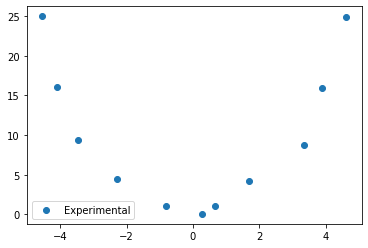

In [117]:
fig, ax = plt.subplots()
ax.scatter(x, y, label='Experimental')
ax.legend()
plt.show()

### Определим вид функции f(x, коэффициенты)

График точек похож на график параболы. Значит будем искать параболу $b_0 + b_1 x + b_2 x^2$

In [118]:
# какой функцией будем апроксимировать
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x**2

### Найдем коэффициенты этой функции

In [119]:
from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(f, x, y)
beta_opt

array([-0.49958624,  0.08708628,  1.0987697 ])

In [120]:
b0, b1, b2 = beta_opt
print(f'b0={b0}')
print(f'b1={b1}')
print(f'b2={b2}')

b0=-0.4995862379309357
b1=0.08708627582393469
b2=1.098769698634771


К графику точек добавим график найденной параболы

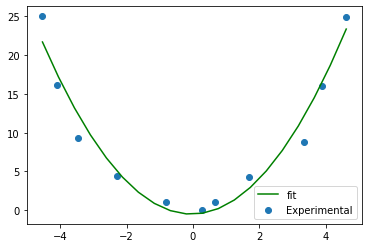

In [121]:
xx = np.linspace(min(x), max(x), 20)   # это х координаты точек для рисования графика, 20 штук
y_lsq = f(xx, b0, b1, b2)              # это y координаты точек для рисования графика, 

fig, ax = plt.subplots()
ax.scatter(x, y, label='Experimental')
ax.plot(xx, y_lsq, 'g-', label='fit')

ax.legend()
plt.show()

На самом деле "экспериментальные" точки получены из функции $x^2$ (в конце этой тетради написано как мы получили точки). Нарисуем и теоретическую кривую. Посмотрим как далеко отошла полученная парабола от начальной "чистой" параболы.

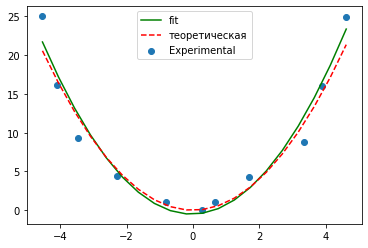

In [122]:
xx = np.linspace(min(x), max(x), 20)   # это х координаты точек для рисования графика, 20 штук
y_lsq = f(xx, b0, b1, b2)              # это y координаты точек для рисования графика, 
y_theor = xx**2                        # y координаты для рисования теоретической параболы

fig, ax = plt.subplots()
ax.scatter(x, y, label='Experimental')
ax.plot(xx, y_lsq, 'g-', label='fit')
ax.plot(xx, y_theor, 'r--', label='теоретическая')

ax.legend()
plt.show()

## Пример 2. scipy.optimize.curve_fit для сложной функции

В примере апроксимируем данные функцией вида $$b_0 + b_1 e^{-b_2 * x^2}$$

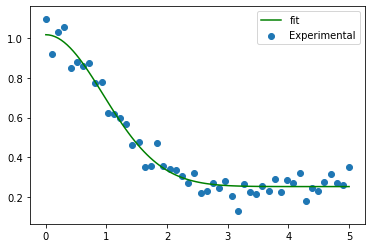

In [123]:
import numpy as np                 # для чтения точек
import matplotlib.pyplot as plt    # для рисования графикиков
from scipy.optimize import curve_fit     # для поиска коэффициентов апроксимирующей фукнции

# читаем данные из файла (положите их в ту же директорию, что эту тетрадь)
xdata = np.fromfile('x_data1.txt', float, sep='\n')
ydata = np.fromfile('y_data1.txt', float, sep='\n')

# задаем вид апроксимирующей функции
def myfunc(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)

# вычисляем коэффициенты функции
beta_opt, beta_cov = curve_fit(myfunc, xdata, ydata)
b0, b1, b2 = beta_opt

# рисуем график
xx = np.linspace(min(xdata), max(xdata), 100)    # берем много точек для рисования красивого графика
yy = myfunc(xx, *beta_opt)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='Experimental')
ax.plot(xx, yy, 'g-', label='fit')
ax.legend()
plt.show()

### Как хорошо функция проходит через набор точек?

Пусть у нас есть 2 разных фукнции f1 и f2, которые приближают один и тот же набор точек. Какая функция приближает набор лучше? Та, у которой среднеквадратичное отклонение меньше.

Посчитаем для данных точек x и y и функции myfunc с коэффициентами beta_opt среднеквадратичное отклонение. 

**Чем меньше сумма квадратов отклонений, тем лучше фукнция приближает этот набор экспериментальных точек**:

In [124]:
# построим набор разности по оси Y для экспериментальной точки и ее приближению функцией my_func
residuals = ydata - f(xdata,*beta_opt)
# сумма квадратов отклонений
fres = sum(residuals**2)
print (f'квадрат отклонений для функции myfunc = {fres}')

квадрат отклонений для функции myfunc = 3620.355747880774


# Дальше идет только дополнительный материал. Можно его не читать.

## Дополнительно: по точкам проводим ПРЯМУЮ с помощью  np.linalg.lstsq

Метод **curve_fit** работает для любого типа функций. Этот метод и метод ниже может вам встретиться в работах. Его сложнее применять. **Этот материал дополнительный. Его можно не читать.**

Взято [отсюда](https://pyprog.pro/linear_algebra_functions/linalg_lstsq.html)

Пусть у нас есть экспериментальные точки с координатами х и у, через которые нужно провести **прямую**. 

Будем искать функцию в виде прямой $b_1 x + b_0$. Для одной точки $(x_i, y_i)$ получим уравнение  $b_1 x_i + b_0 = y_i$.

Для всех точек получим систему уравнений:

$$
  \begin{cases}
   b_1 x_0 + b_0 = y_0 \\
   ... \\
    b_1 x_i + b_0 = y_i \\
    ... \\
    b_1 x_n + b_0 = y_n
  \end{cases}
$$  


Запишем систему в виде уравнения матриц $AB=Y$ и найдем из него $В$.

$$\begin{bmatrix}
       x_0 & 1 \\
       x_1 & 1 \\
       ... \\
       x_n & 1
     \end{bmatrix}
 \cdot 
 \begin{bmatrix}
       b_1 \\
       b_0
     \end{bmatrix}
 =
 \begin{bmatrix}
       y_0 \\
       y_1 \\
       ... \\
       y_n
     \end{bmatrix}
$$     

Эта система переопределена. У нас 2 неизвестных $b_1$ и $b_0$. И $n$ уравнений. Система не имеет точного решения. Будем искать приближенное решение по методу наименьших квадратов с помощью функции из пакета линейной алгебры библиотеки numpy.

Найти $b_1$ и $b_0$, чтобы сумма квадратов отклонений от точек (x, y) была наименьшей, поможет функция **np.linalg.lstsq**


Зададим пока точки вручную:

In [125]:
x = np.array([0, 1, 2, 3])
x

array([0, 1, 2, 3])

In [126]:
y = np.array([-1, 0.2, 0.9, 2.1])
y

array([-1. ,  0.2,  0.9,  2.1])

In [127]:
A = np.vstack([x, np.ones(len(x))]).T   # разберем это по шагам ниже:
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

Как строим единичный вектор того же размера, что и х? `no.ones(len(x))`

Далее ставим один вектор вертикально на другой `no.ones(len(x))`

In [128]:
# построим единичный вектор той же длины, что и х
np.ones(len(x))

array([1., 1., 1., 1.])

In [129]:
# Далее ставим один вектор вертикально на другой
np.vstack([x, np.ones(len(x))])

array([[0., 1., 2., 3.],
       [1., 1., 1., 1.]])

In [130]:
# и трансформируем получившуюся матрицу
A = np.vstack([x, np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [131]:
bsolve = np.linalg.lstsq(A, y)
# Может быть предупреждение (Warning)
bsolve

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(array([ 1.  , -0.95]), array([0.05]), 2, array([4.10003045, 1.09075677]))

In [132]:
b1, b0 = bsolve[0]
b1, b0

(0.9999999999999997, -0.9499999999999992)

In [133]:
#help(np.linalg.lstsq)   # если хотите прочитать подробно как работает фукнция, уберите первый # 

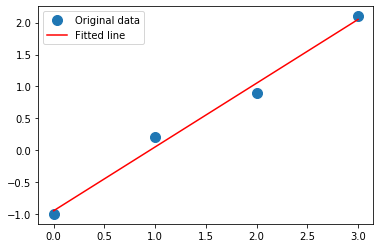

In [134]:
plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, b1*x + b0, 'r', label='Fitted line')
plt.legend()
plt.show()

## Дополнительно: по точкам проводим ПАРАБОЛУ с помощью  scipy.linalg.lstsq

Пакет линейной алгебры linalg есть не только в numpy, но и в scipy. Сделаем этот пример с помощью scipy.linalg.lstsq.

Возьмем точки из самого первого примера этого урока. В нем точки были получены из параболы $x^2$ путем внесения случайной ошибки. Построим приближение параболой с помощью метода scipy.linalg.lstsq, а не scipy.optimize.curve_fit.

График тоже будем рисовать методами пакета scipy.

Сравним, как проще писать программу.

Пусть у нас есть экспериментальные точки с координатами х и у, через которые нужно провести **параболу**. 

Будем искать функцию в виде параболы $b_2 x^2 + b_1 x + b_0$. Для одной точки $(x_i, y_i)$ получим уравнение  $b_2 {x_i}^2 + b_1 x_i + b_0 = y_i$.

Для всех точек получим систему уравнений:

$$
  \begin{cases}
   b_2 {x_0}^2 + b_1 x_0 + b_0 = y_0 \\
   ... \\
    b_2 {x_i}^2 + b_1 x_i + b_0 = y_i \\
    ... \\
    b_2 {x_n}^2 + b_1 x_n + b_0 = y_n
  \end{cases}
$$  


Как в предыдущем примере с прямой, запишем систему в виде матричного уравнения $АВ=Y$
Запишем систему в виде уравнения матриц $AB=Y$ и найдем из него $В$.

$$\begin{bmatrix}
       x_0^2 & x_0 & 1 \\
       x_1^2 & x_1 & 1 \\
       ... \\
       x_n^2 & x_n & 1
     \end{bmatrix}
 \cdot 
 \begin{bmatrix}
       b_2 \\
       b_1 \\
       b_0
     \end{bmatrix}
 =
 \begin{bmatrix}
       y_0 \\
       y_1 \\
       ... \\
       y_n
     \end{bmatrix}
$$     

In [135]:
import pylab as pl
import scipy.linalg as slg

читаем точки из файлов x.txt и y.txt, которые лежат в той же директории, что наш ipnb файл

In [136]:
# читаем данные из файлов
x = pl.fromfile('xdata.txt', float, sep='\n')
y = pl.fromfile('ydata.txt', float, sep='\n')

In [137]:
# проверим, что они прочитались и прочитались верно
x, y

(array([-4.53349566, -4.09365239, -3.46164907, -2.27536521, -0.79951864,
         0.25884861,  0.67814209,  1.67746175,  3.33979665,  3.87971286,
         4.61988762]),
 array([24.99343934, 16.08643736,  9.35597228,  4.40895323,  1.05652519,
         0.05935373,  1.0791226 ,  4.22402583,  8.77775631, 15.95499724,
        24.91643896]))

In [138]:
# задаем вектор A = [x**2, x, E]
#A = np.vstack([x, np.ones(len(x))]).T - было, но теперь это функции из пакета scipy.linalg
A = pl.vstack((x**2, x, ones(len(x)))).T
A

array([[20.55258286, -4.53349566,  1.        ],
       [16.7579899 , -4.09365239,  1.        ],
       [11.98301431, -3.46164907,  1.        ],
       [ 5.17728684, -2.27536521,  1.        ],
       [ 0.63923006, -0.79951864,  1.        ],
       [ 0.0670026 ,  0.25884861,  1.        ],
       [ 0.45987669,  0.67814209,  1.        ],
       [ 2.81387792,  1.67746175,  1.        ],
       [11.15424164,  3.33979665,  1.        ],
       [15.05217185,  3.87971286,  1.        ],
       [21.3433616 ,  4.61988762,  1.        ]])

In [139]:
# находим коэффициенты при составляющих вектора m
B = slg.lstsq(A,y)[0]
B

array([ 1.0987697 ,  0.08708628, -0.49958624])

In [140]:
b2, b1, b0 = B
b2, b1, b0

(1.0987696995088858, 0.087086279995229, -0.4995862380513434)

Рисуем графики с помощью методов пакета pylab. Названия методов - такие же, какие мы использовали раньше в matplotlib и numpy.

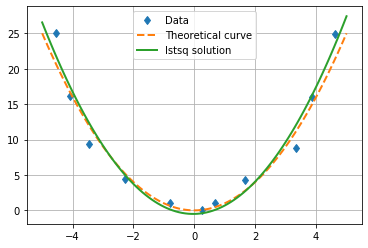

In [141]:
# на отрезке [-5,5] возьмем 100 точек
x_prec = pl.linspace(-5, 5, 101)

# рисуем точки
pl.plot(x, y, 'd')

# рисуем теоретическую кривую x<sup>2</sup>
pl.plot(x_prec, x_prec**2, '--', lw=2)

# рисуем кривую вида y = ax<sup>2</sup> + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
pl.plot(x_prec, b2 * x_prec**2 + b1*x_prec + b0, '-', lw=2)

pl.grid()
pl.legend(('Data', 'Theoretical curve', 'lstsq solution'), loc='upper center')
pl.show()

Как видно, самый простой для программирования метод - это curve_fit.

* Читаем координаты точек x и y.
* определяем функцию, которая по х и коэффициентам вычисляет y
* используем curve_fit

## Генерация данных по теоретической кривой

Напишем, как по теоретической кривой сделать точки, которые будут чуть-чуть случайно от нее отличаться. Это наш набор "экспериментальных данных", по которым в примерах и домашней работе будут строиться кривые.

### Генерация точек для параболы $x^2$

In [144]:
from numpy import *
from numpy.random import *

delta = 1.0
x = linspace(-5,5,11)          # 10 точек от -5 до 5
y = x**2+delta*(rand(11)-0.5)  # для y к точному значению x**2 добавляем случайную погрешность
x += delta*(rand(11)-0.5)      # добавляем случайную погрешность для х

x.tofile('x_mydata.txt', '\n')   # записать в файл с разделителем \n (каждое число на новой строке)
y.tofile('y_mydata.txt', '\n')

### Генерация данных для экспоненты

проверяем гипотезу, что наши точки ложатся на кривую вида $$f (x,b) = b_0 + b_1 \cdot \exp(-b_2 \cdot x^2) $$

In [145]:
# сначала определим фнукцию
def myfunc(x, *b):
    return b[0] + b[1]*np.exp(-b[2]*x**2)

Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5) 

In [148]:
beta = (0.25, 0.75, 0.5)
# зададим массив точек хi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = myfunc(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))